# MG MidiAnalysis

In [1]:
import sys
sys.executable

'/home/cipher000/anaconda3/envs/MusicGenerator1/bin/python'

In [8]:
import pretty_midi
import pandas as pd
import numpy as np

import mir_eval.display
import librosa.display
from music21 import converter, instrument, note, chord, stream,graph, lily, corpus, environment, configure
import matplotlib.pyplot as plt
%matplotlib inline

from midi2audio import FluidSynth
import IPython.display as ipd

import os

In [3]:
# environment.get('musicxmlPath')

In [11]:
# c = converter.Converter()

In [9]:
# for sc in c.defaultSubconverters():
#     print(sc)

In [15]:
# midi_files = '/media/cipher000/DATA/Music/ABBA-.mid'
# c = converter.Converter()
# c.regularizeFormat(midi_files)
# print(c)

In [9]:



# conv = lily.translate.LilypondConverter()


In [10]:
import glob
midi_files = '/media/cipher000/DATA/Music/MidiWorld/Pop/AceofBase-Sign.mid'
for file in glob.glob(midi_files): # loading midi filepaths
    print(file)
midi = converter.parse(file)

/media/cipher000/DATA/Music/MidiWorld/Pop/AceofBase-Sign.mid


In [11]:
midi.measures(1,5).show()

SubConverterException: To create PNG files directly from MusicXML you need to download MuseScore and put a link to it in your .music21rc via Environment.

In [ ]:
# configure.run()

In [4]:
url = '/media/cipher000/DATA/Downloads/5030970-RUSH_But_Its_ACTUALLY_PLAYABLE.xml'
sAlt = converter.parse(url)
sAlt.measures(1, 5).show() # show first 5 measures

ConverterException: File not found or no such format found for: /media/cipher000/DATA/Downloads/5030970-RUSH_But_Its_ACTUALLY_PLAYABLE.xml

In [ ]:
# music21 environment
us = environment.UserSettings()
for key in sorted(us.keys()):
    print(key)

In [ ]:
us['directoryScratch'] = '/_scratch'
us['directoryScratch']

In [ ]:
us.getSettingsPath()

In [ ]:
print(lily.translate.makeLettersOnlyId('rainbow123@@dfas'))

In [ ]:
lpc = lily.translate.LilypondConverter()
lpMusicList = lily.lilyObjects.LyMusicList()
lpc.context = lpMusicList
lpc.context.contents

In [ ]:
n1 = note.Note(quarterLength=0.25)
n2 = note.Note(quarterLength=0.25)
n1.beams.fill(2,'start')
n2.beams.fill(2,'stop')

In [ ]:
lpc.appendBeamCode(n1)
print(lpc.context.contents)

In [ ]:
print(lpc.context)

In [ ]:
conv = lily.translate.LilypondConverter()
n0 = note.Note('D#5')
n0.pitch.accidental.displayType='always'
n0.pitch.accidental.displayStyle = 'parentheses'
n0.style.color = 'blue'
sm = conv.lySimpleMusicFromNoteOrRest(n0)
print(sm)

In [ ]:
n0.style.hideObjectOnPrint = True
sm = conv.lySimpleMusicFromNoteOrRest(n0)
print(sm)

In [ ]:
s = converter.parse('http://midirepository.org/file220/file.mid')

In [ ]:
b = corpus.parse('bach/bwv66.6')
b.show()

In [ ]:
lpc.converter.parse('tinynotation: 3/4 c4 d8 f g16 a g f#').show()

In [12]:
fs = 16000
rate = 16000
start_pitch = 24
end_pitch = 84

In [13]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=10):
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))
    
def analyze_midi(midi_file):
    instrument_dict = {}
    pm = pretty_midi.PrettyMIDI(midi_file)
    plt.figure(figsize=(12, 6))
    plot_piano_roll(pm, start_pitch, end_pitch)
    print("Time Signature Changes: {} Instruments: {}".format(len(pm.time_signature_changes), len(pm.instruments)))
    for instrument_num in range(len(pm.instruments)):
        instrument_dict[instrument_num] = {'Notes': len(pm.instruments[instrument_num].notes), 
                                           'Pitch_Bends':len(pm.instruments[instrument_num].pitch_bends),
                                           'Control_Changes':len(pm.instruments[instrument_num].control_changes)}
    instrument_dict = pd.DataFrame(instrument_dict)
    return instrument_dict, pm

Time Signature Changes: 1 Instruments: 9


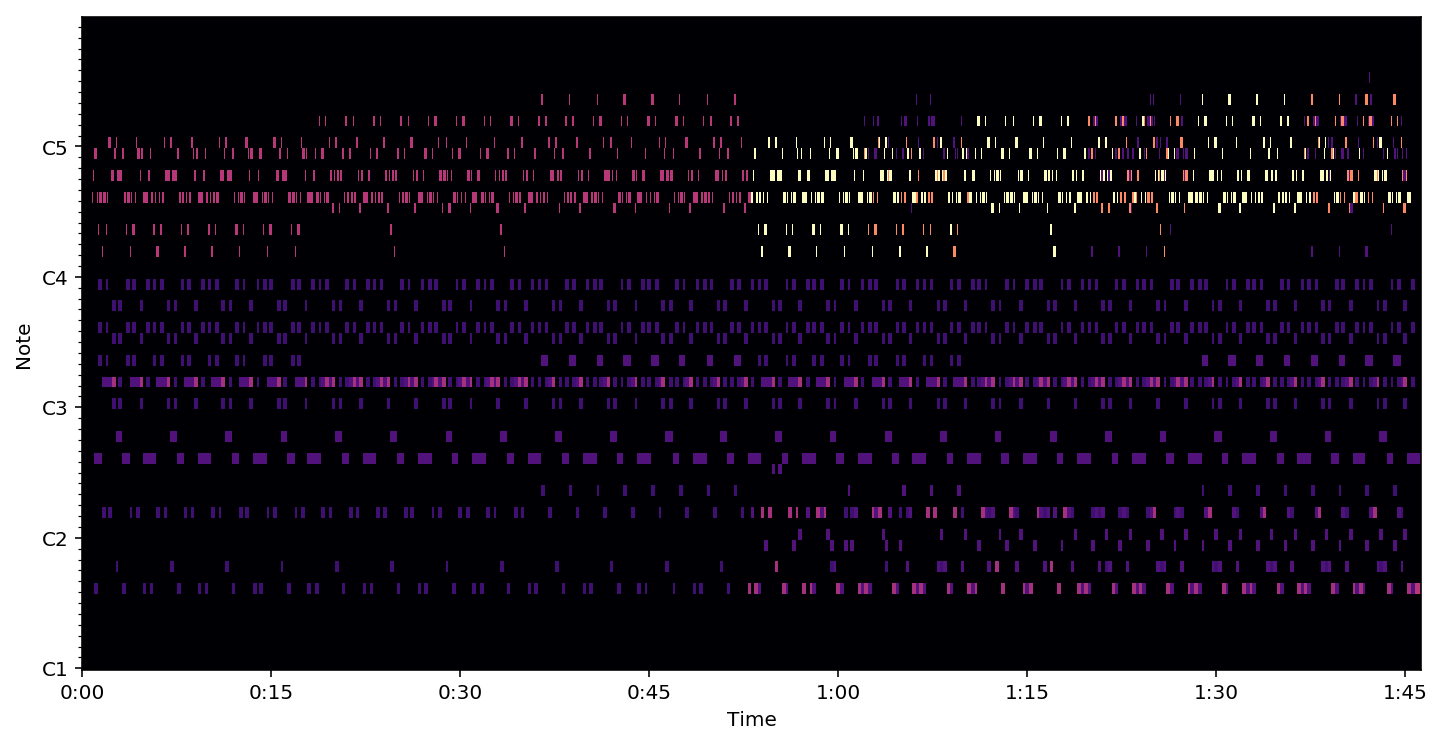

In [15]:
midi_file = '../../data/Music/Tadpole/CelticMidis/30BOTHUG.MID'
instrument_dict,pm = analyze_midi(midi_file)
ipd.Audio(pm.synthesize(fs=fs), rate=rate)

In [ ]:
midi_file = '../data/BritneySpears/DriveMeCrazyRemixBritneySpears.mid'
instrument_dict,pm = analyze_midi(midi_file)
ipd.Audio(pm.synthesize(fs=fs), rate=rate)

In [ ]:
midi_file = '/home/ubuntu/GitClones/McMahon_Metis/Project_5/data/Mozart-MuseData/M-k450-01.mid'
FluidSynth().play_midi(midi_file)
fs = FluidSynth()
wav_file = midi_file.replace('.mid','.wav')
flac_file = midi_file.replace('.mid','.flac')
fs.midi_to_audio(midi_file,wav_file)
fs.midi_to_audio(midi_file,flac_file)

In [ ]:
# wav_file = '/home/ubuntu/GitClones/McMahon_Metis/Project_5/data/ChillingMusic.wav'
ipd.Audio(wav_file)

In [ ]:
ipd.Audio(flac_file)

In [ ]:
y, sr = librosa.load(wav_file, duration=10)
plt.figure()
plt.subplot(3,1,1)
librosa.display.waveplot(y,sr=sr)
plt.title('Monophonic')

In [ ]:
y, sr = librosa.load(flac_file, mono=False, duration=10)
plt.subplot(3,1,2)
librosa.display.waveplot(y,sr=sr)
plt.title('Stereo')

In [ ]:
y, sr = librosa.load(wav_file, duration=10)
y_harm, y_perc = librosa.effects.hpss(y)
plt.subplot(3,1,3)
librosa.display.waveplot(y_harm, sr=sr, alpha=0.25)
librosa.display.waveplot(y_perc, sr=sr, color='r',alpha=0.5)
plt.title('Harmonic + Percussive')
plt.tight_layout()

In [ ]:
midi_file = '../output/20180322-BritneySpears-lstm_midi-20.mid'
instrument_dict,pm = analyze_midi(midi_file)
IPython.display.Audio(pm.synthesize(fs=fs), rate=rate)

In [ ]:
instrument_dict

In [ ]:
midi_file = '../output/20180322-BritneySpears-lstm_midi-50.mid'
instrument_dict,pm = analyze_midi(midi_file)
IPython.display.Audio(pm.synthesize(fs=fs), rate=rate)

In [ ]:
midi_file = '../output/20180323-BritneySpears-lstm_midi-200.mid'
instrument_dict,pm = analyze_midi(midi_file)
IPython.display.Audio(pm.synthesize(fs=fs), rate=rate)

In [ ]:
instrument_dict

In [ ]:
midi_file = '../data/BritneySpears/DriveMeCrazyRemixBritneySpears.mid'
midi = converter.parse(midi_file)
# s = corpus.parse(midi_file)
midi.plot('histogram','pitch')

In [ ]:
midi.plot('pianoroll')

In [ ]:
p = graph.plot.WindowedKey(midi.parts[0])
p.run()

In [ ]:
q = graph.plot.ScatterPitchSpaceQuarterLength(midi)
print(q.id)
q.run()

In [ ]:
dyn = ['p', 'mf', 'f', 'ff', 'mp', 'fff', 'ppp']
i = 0
for p in midi.parts:
    for m in p.getElementsByClass('Measure'):
        m.insert(0,dynamics.Dynamic(dyn[i % len(dyn)]))
        i +=1
midi.plot('dolan',fillByMeasure=True, segmentByTarget=True)

In [ ]:
r = graph.plot.Plot3DBarsPitchSpaceQuarterLength(midi)
print(r.id)
r.run()

### midi2audio

In [ ]:
IPython.display.Audio(pm.synthesize(fs=fs), rate=rate)

In [ ]:
ipd.Audio(flac_file)

### Librosa

In [ ]:
import librosa
import librosa.display

In [ ]:
x,sr = librosa.load(flac_file)

In [ ]:
plt.figure(figsize=(14,5))
librosa.display.waveplot(x,sr=sr)

In [ ]:
n_fft = 1024
hop_length = int(librosa.time_to_samples(1./200, sr=sr))
lag = 2
n_mels = 138
fmin = 27.5
fmax = 16000.
max_size = 3

In [ ]:
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft,
                                   hop_length=hop_length,
                                   fmin=fmin,
                                   fmax=fmax,
                                   n_mels=n_mels)


plt.figure(figsize=(6, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                         y_axis='mel', x_axis='time', sr=sr,
                         hop_length=hop_length, fmin=fmin, fmax=fmax)
plt.tight_layout()

In [ ]:
odf_default = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
onset_default = librosa.onset.onset_detect(y=y, sr=sr, hop_length=hop_length,
                                           units='time')

In [ ]:
odf_sf = librosa.onset.onset_strength(S=librosa.power_to_db(S, ref=np.max),
                                      sr=sr,
                                      hop_length=hop_length,
                                      lag=lag, max_size=max_size)

onset_sf = librosa.onset.onset_detect(onset_envelope=odf_sf,
                                      sr=sr,
                                      hop_length=hop_length,
                                      units='time')

In [ ]:
# sphinx_gallery_thumbnail_number = 2
plt.figure(figsize=(6, 6))

frame_time = librosa.frames_to_time(np.arange(len(odf_default)),
                                    sr=sr,
                                    hop_length=hop_length)

ax = plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                         y_axis='mel', x_axis='time', sr=sr,
                         hop_length=hop_length, fmin=fmin, fmax=fmax)
plt.xlim([0, 5.0])
plt.axis('tight')


plt.subplot(4, 1, 1, sharex=ax)
plt.plot(frame_time, odf_default, label='Spectral flux')
plt.vlines(onset_default, 0, odf_default.max(), label='Onsets')
plt.xlim([0, 5.0])
plt.legend()


plt.subplot(4, 1, 2, sharex=ax)
plt.plot(frame_time, odf_sf, color='g', label='Superflux')
plt.vlines(onset_sf, 0, odf_sf.max(), label='Onsets')
plt.xlim([0, 5.0])
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
tempo, beat_frames = librosa.beat.beat_track(y=y,sr=sr)

In [ ]:
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

In [ ]:
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

In [ ]:
librosa.output.times_csv('../output/beat_times.csv',beat_times)

In [ ]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display
from librosa.core import midi_to_note

In [ ]:
midi = midi_to_note(midi_file,octave=False)#cents=True)

In [ ]:
y, sr = librosa.load(midi_file,
                     sr=44100,
                     duration=5,
                     offset=35)

In [ ]:
plt.figure(figsize=(6, 6))

frame_time = librosa.frames_to_time(np.arange(len(odf_default)),
                                    sr=sr,
                                    hop_length=hop_length)

ax = plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                         y_axis='mel', x_axis='time', sr=sr,
                         hop_length=hop_length, fmin=fmin, fmax=fmax)
plt.xlim([0, 5.0])
plt.axis('tight')


plt.subplot(4, 1, 1, sharex=ax)
plt.plot(frame_time, odf_default, label='Spectral flux')
plt.vlines(onset_default, 0, odf_default.max(), label='Onsets')
plt.xlim([0, 5.0])
plt.legend()


plt.subplot(4, 1, 2, sharex=ax)
plt.plot(frame_time, odf_sf, color='g', label='Superflux')
plt.vlines(onset_sf, 0, odf_sf.max(), label='Onsets')
plt.xlim([0, 5.0])
plt.legend()

plt.tight_layout()
plt.show()

### Pretty Midi

In [ ]:
# pm = pretty_midi.PrettyMIDI(initial_tempo=80)
pm = pretty_midi.PrettyMIDI(midi_file)

In [ ]:
IPython.display.Audio(pm.synthesize(fs=fs), rate=rate)

In [ ]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=10):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

plt.figure(figsize=(12, 6))
plot_piano_roll(pm, start_pitch, end_pitch)

In [ ]:
pm.instruments

In [ ]:
inst = pretty_midi.Instrument(program=42, is_drum=False, name='my cello')
pm.instruments.append(inst)

In [ ]:
velocity = 100
for pitch, start, end in zip([60,62,64],[0.2,0.6,1.0],[1.1,1.7,2.3]):
    inst.notes.append(pretty_midi.Note(velocity,pitch,start,end))
print(inst.notes)

In [ ]:
print("Time Signature Changes: {} Instruments: {}".format(len(pm.time_signature_changes), len(pm.instruments)))
instrument_dict = {}
for instrument_num in range(len(pm.instruments)):
    instrument_dict[instrument_num] = {'Notes': len(pm.instruments[instrument_num].notes), 
                                       'Pitch_Bends':len(pm.instruments[instrument_num].pitch_bends),
                                       'Control_Changes':len(pm.instruments[instrument_num].control_changes)}

In [ ]:
instrument_dict = pd.DataFrame(instrument_dict)
instrument_dict

In [ ]:
beats = pm.get_beats()
downbeats = pm.get_downbeats()
plt.figure(figsize=(12,4))
plot_piano_roll(pm, 24,84)
ymin, ymax = plt.ylim()
mir_eval.display.events(beats, base=ymin, height=ymax, color='#AAAAAA')
mir_eval.display.events(downbeats, base=ymin, height=ymax, color='#FFFFFF', lw=2)
plt.xlim(25,45)

In [ ]:
plt.bar(np.arange(12),pm.get_pitch_class_histogram())
plt.xticks(np.arange(12),['C','','D','','E','','F','','G','','A','','B'])
plt.xlabel('Note')
plt.ylabel('Proportion')

### Music21

In [ ]:
fp = midi_file
mf = midi.MidiFile()
mf.open(str(fp))
mf.read()
mf.close()
print(len(mf.tracks))
s = midi.translate.midiFileToStream(mf)
print(len(s.flat.notesAndRests))

In [ ]:
dir(note)

In [ ]:
f = note.Note('F5')

In [ ]:
f.pitch.frequency

In [ ]:
r = note.Rest(type='whole')

In [ ]:
r.show()

In [ ]:
f.show('midi')

In [ ]:
converter.parse('tinynotation: 3/4 c4 d8 f g16 a g f#').show()

### Librosa